In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from Jvis import JUMAP, UMAP, JUMAPBASE

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [3]:
expr_mat = pd.read_csv('data/GSE126074_CellLineMixture_SNAREseq_cDNA_counts.tsv', sep='\t')

In [4]:
#atac_mat = pd.read_csv('data/snare_seq/GSE126074_CellLineMixture_SNAREseq_chromatin_counts.tsv', sep = '\t')

# pre-processing gene expression data

In [5]:
scale_factor = 10000
expr_mat = expr_mat.values
expr_mat_log_t = np.log(scale_factor*expr_mat + 1.0)

In [6]:
expr_reduced = PCA(n_components=20).fit_transform(expr_mat_log_t.T)

In [7]:
from anndata import AnnData
import scanpy.api as sc
adata = AnnData(X=expr_reduced)
sc.pp.neighbors(adata, use_rep='X')
sc.tl.louvain(adata, key_added='louvain', resolution = 0.2)
louv_labels = np.array(adata.obs['louvain'].tolist())
louv_labels = [int(x) for x in louv_labels]

/home/vanhoan310/miniconda3/envs/umap/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [8]:
umap = UMAP().fit_transform(expr_reduced)

My name is Hoan
Always use exact mode


In [9]:
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','b','g', 'orange'])
classes = ['H1', 'BJ', 'K562', 'GM12878']

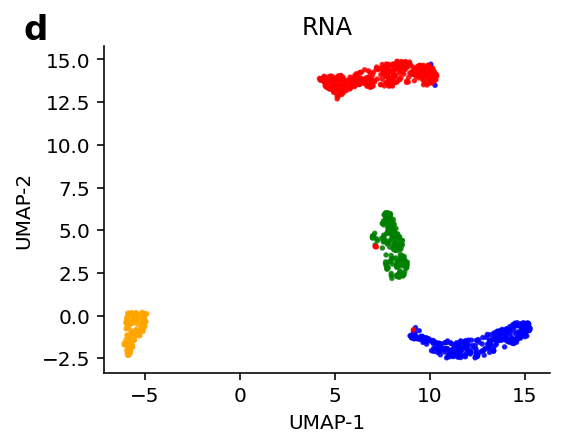

In [10]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(umap[:,0], umap[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
# ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('RNA')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_umap_RNA.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'd', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_umap_RNA.pdf', bbox_inches='tight', pdi=800)
plt.show()

In [11]:
def make_noise_numpy_data_shuffle(expression_matrix, prop, random_seed):
    np.random.seed(random_seed)
    n_rows, n_cols = expression_matrix.shape
    n_elem = round(prop*n_cols)
    s = np.arange(n_cols)
    for i in range(n_rows):
        row_id = list(np.random.choice(s, size=n_elem, replace=False))
        v = expression_matrix[i, row_id]
        np.random.shuffle(v)
        expression_matrix[i, row_id] = v

In [12]:
louv_labels = np.array(louv_labels)
cl1 = 0
cl2 = 1
selected_cells = (louv_labels==cl1) + (louv_labels==cl2)
expr_matsub = np.copy(expr_mat[:, selected_cells])
make_noise_numpy_data_shuffle(expression_matrix = expr_matsub, prop = 0.8, random_seed = 0)
expr_copy = np.copy(expr_mat)                     
expr_copy[:, selected_cells] = expr_matsub

In [13]:
expr_matsub.shape, expr_copy.shape

((18666, 715), (18666, 1047))

In [14]:
scale_factor = 10000
expr_mat_log_t = np.log(scale_factor*expr_copy + 1.0)
expr_noise_reduced = PCA(n_components=20).fit_transform(expr_mat_log_t.T)

In [15]:
umap_noise = UMAP().fit_transform(expr_noise_reduced)

My name is Hoan
Always use exact mode


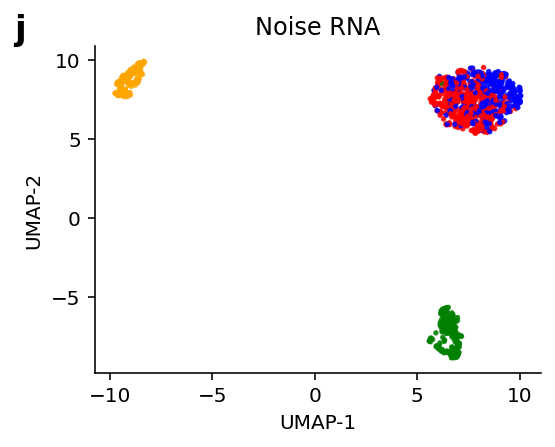

In [16]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(umap_noise[:,0], umap_noise[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
# ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('Noise RNA')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_umap_noiseRNA.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'j', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_umap_noiseRNA.pdf', bbox_inches='tight', pdi=800)
plt.show()

# ATAC-seq

In [17]:
atacTopic_mat = pd.read_csv('data/GSE126074_CellLineMixture_SNAREseq_chromatin_topics.tsv', sep = '\t') 

In [18]:
atac_reduced = PCA(n_components=10).fit_transform(atacTopic_mat.values.T)

In [19]:
atac_reduced.shape

(1047, 10)

In [20]:
umap = UMAP().fit_transform(atac_reduced)

My name is Hoan
Always use exact mode


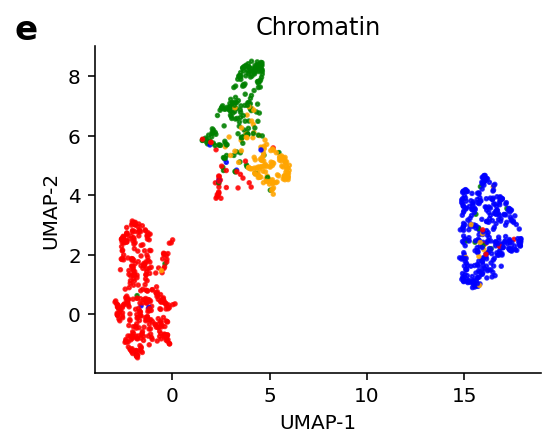

In [21]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(umap[:,0], umap[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
# ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('Chromatin')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_umap_Chromatin.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'e', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_umap_Chromatin.pdf', bbox_inches='tight', pdi=800)
plt.show()

# Random modality

In [22]:
noise_matrix = np.random.rand(1047,20)

In [23]:
umap = UMAP().fit_transform(noise_matrix)

My name is Hoan
Always use exact mode


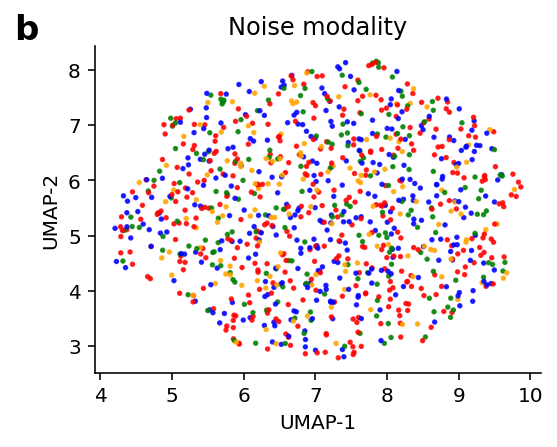

In [24]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(umap[:,0], umap[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
# ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('Noise modality')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_umap_noisemodality.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'b', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_umap_noisemodality.pdf', bbox_inches='tight', pdi=800)
plt.show()

# Joint visualization

In [25]:
# Joint UMAP of RNA and Chromatin
data = {'rna': expr_reduced, 'chromatin': atac_reduced}
joint_umap_obj = JUMAP()
joint_umap = joint_umap_obj.fit_transform(X = data)

Always use exact mode: JUMAP


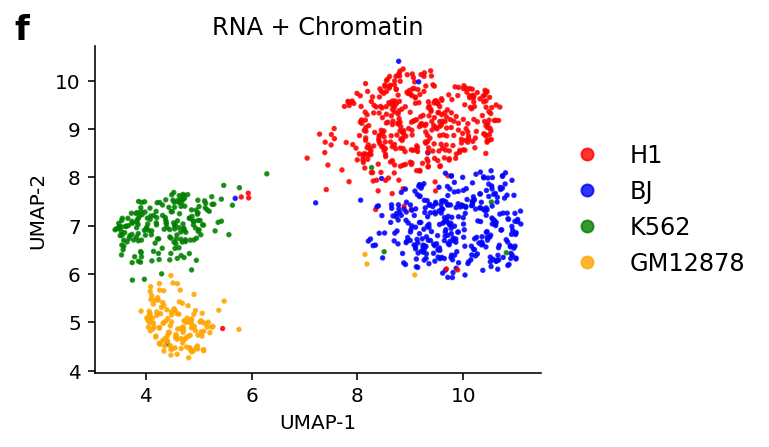

In [34]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
scatter = ax.scatter(joint_umap[:,0], joint_umap[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
lgd = ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('RNA + Chromatin')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_umap_RNA_Chromatin.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'f', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_umap_RNA_Chromatin.pdf', bbox_inches='tight', pdi=800)
plt.show()

# Joint with noise

### Noise RNA + Chromatin

In [27]:
data = {'rna_noise': expr_noise_reduced, 'chromatin': atac_reduced}
joint_umap_obj = JUMAP()
joint_umap = joint_umap_obj.fit_transform(X = data)

Always use exact mode: JUMAP


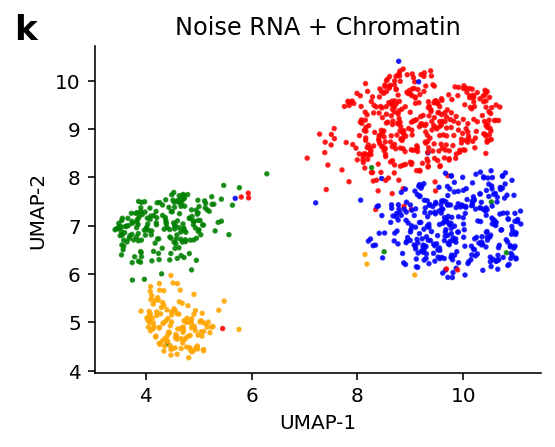

In [28]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(joint_umap[:,0], joint_umap[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
# ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('Noise RNA + Chromatin')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_umap_noiseRNA_Chromatin.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'k', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_umap_noiseRNA_Chromatin.pdf', bbox_inches='tight', pdi=800)
plt.show()

### 3 modalities

In [29]:
data3 = {'rna': expr_noise_reduced, 'chromatin': atac_reduced, 'noise': noise_matrix}

In [30]:
from umap import JUMAP

In [31]:
joint_umap_obj3 = JUMAP()
joint_umap3 = joint_umap_obj3.fit_transform(X = data3, method = 'auto', ld = 1, max_iter = 20)

Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP


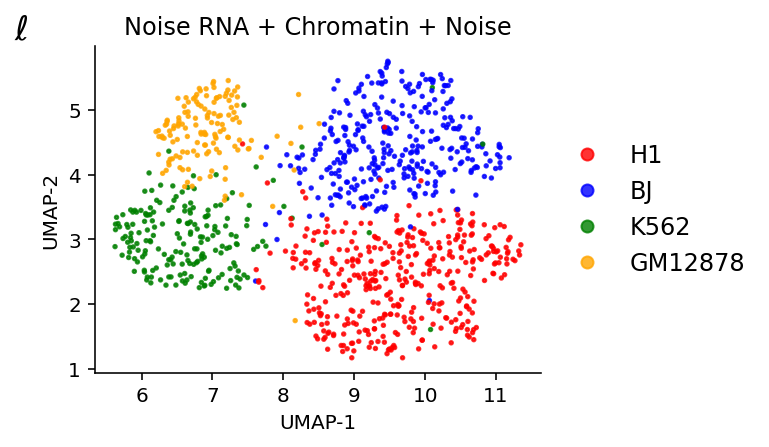

In [35]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
scatter = ax.scatter(joint_umap3[:,0], joint_umap3[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
lgd = ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('Noise RNA + Chromatin + Noise')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_umap_3modalities.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, r'$\ell$', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_umap_3modalities.pdf', bbox_inches='tight', pdi=800)
plt.show()

In [33]:
joint_umap_obj3.alpha

array([0.31330365, 0.4406999 , 0.24599649], dtype=float32)